In [1]:
!pip install seaborn

In [1]:
!pwd

/teamspace/studios/this_studio/mlprojectcars/notebooks


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import chi2_contingency, f_oneway

!matplotlib inline

zsh:1: command not found: matplotlib


In [3]:
DATASET_LOC = '../data/'
prepared_data_file = 'train_df_transformed.csv'
df = pd.read_csv(os.path.join(DATASET_LOC,prepared_data_file))

In [4]:
#Check if there is null data
df.isna().sum()

brand_model       0
year              0
price             0
transmission      0
mileage           0
fuelType          0
tax               0
milesPerGallon    0
engineSize        0
dtype: int64

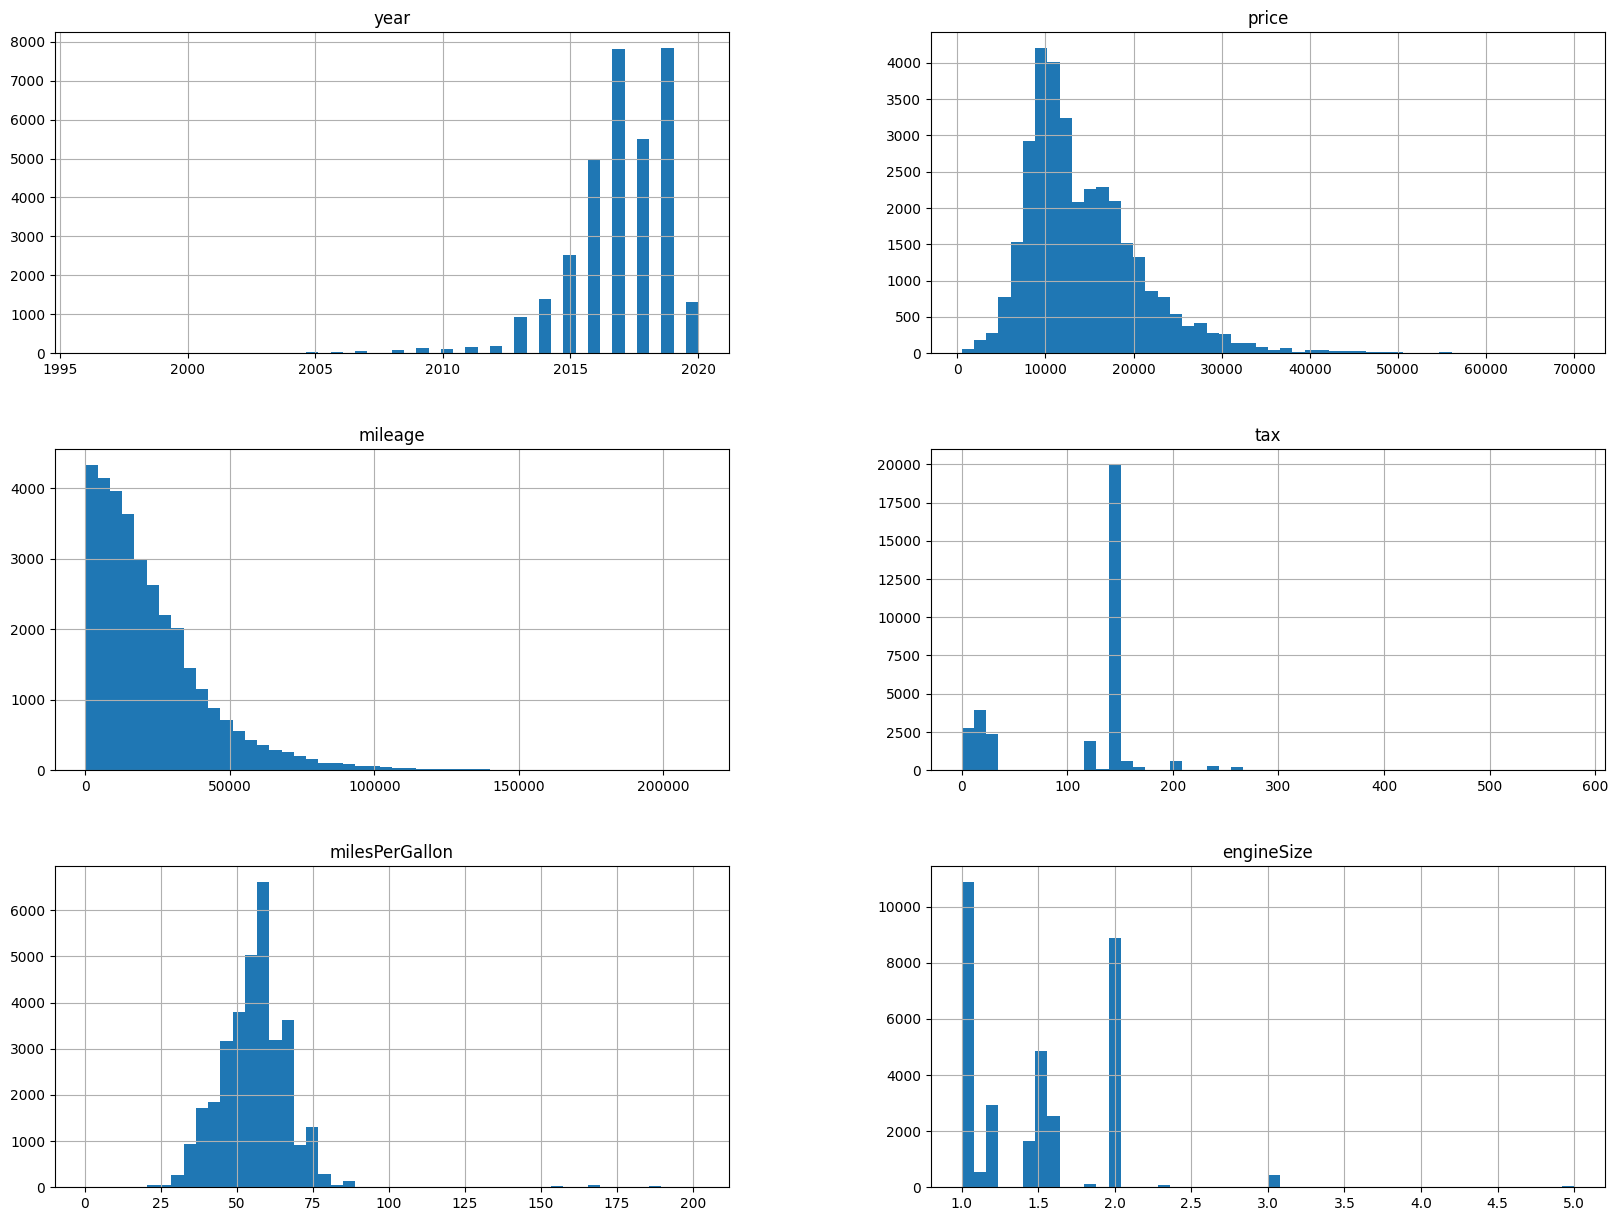

In [5]:
# Información de las columnas
df.hist(bins=50, figsize=(20, 15));

In [9]:
df.head()

,brand_model,year,price,transmission,mileage,fuelType,tax,milesPerGallon,engineSize
0,Ford_Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Ford_Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Ford_Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Ford_Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Ford_Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [7]:
#Transforming variables into the formats we need them
df.dtypes

brand_model        object
year                int64
price               int64
transmission       object
mileage             int64
fuelType           object
tax                 int64
milesPerGallon    float64
engineSize        float64
dtype: object

In [8]:
df['year'].value_counts()

year
2019    7851
2017    7814
2018    5502
2016    4976
2015    2514
2014    1384
2020    1303
2013     922
2012     195
2011     151
2009     122
2010     108
2008      84
2007      52
2006      29
2005      24
2004       7
2003       5
2002       4
2001       4
2000       2
1998       1
1996       1
Name: count, dtype: int64

In [10]:
#Variables numéricas y categóricas
#cat_cols = data.select_dtypes(include=object).columns
#num_cols = data.select_dtypes(include=np.number).columns
num_cols = ['year','price','mileage','tax','milesPerGallon','engineSize']
cat_cols = ['brand_model','transmission','fuelType']

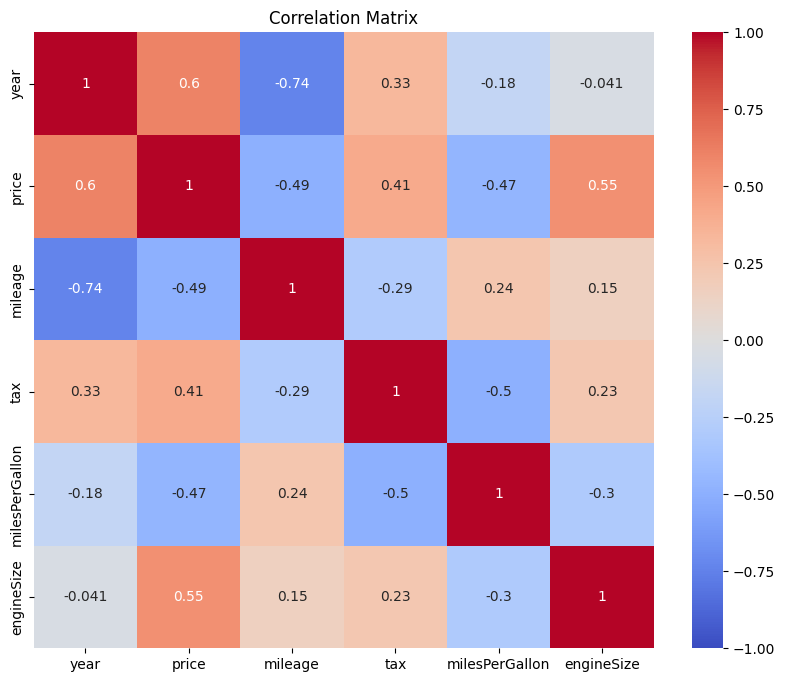

In [11]:
#Pair-wise analysis for numerical features
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

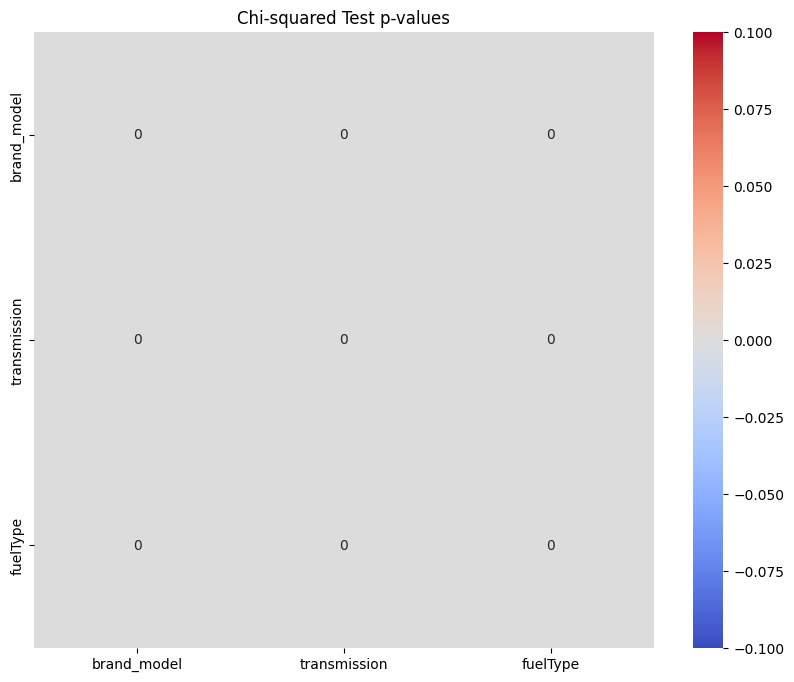

In [14]:
# 2. Chi-squared test among categorical features
chi2_results = np.zeros((len(cat_cols), len(cat_cols)))
for i, feature1 in enumerate(cat_cols):
    for j, feature2 in enumerate(cat_cols):
        if i != j:
            contingency_table = pd.crosstab(df[feature1], df[feature2])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi2_results[i, j] = p

# Plot the chi-squared results
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_results, annot=True, cmap='coolwarm', xticklabels=cat_cols, yticklabels=cat_cols)
plt.title('Chi-squared Test p-values')
plt.show()

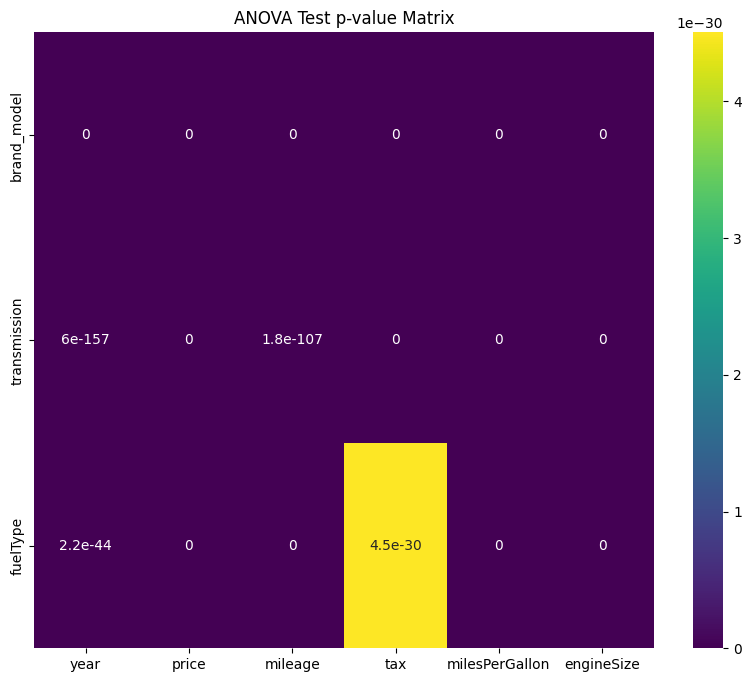

In [19]:
# 3. ANOVA between categorical and numerical features
anova_p_values = np.zeros((len(cat_cols), len(num_cols)))
for i, cat_feature in enumerate(cat_cols):
    for j, num_feature in enumerate(num_cols):
        try:
            groups = [df[num_feature][df[cat_feature] == category] for category in df[cat_feature].unique()]
            f_val, p_val = f_oneway(*groups)
            anova_p_values[i, j] = p_val
        except:
            anova_p_values[i, j] = 1

# Plot the ANOVA test p-value matrix
plt.figure(figsize=(10, 8))
sns.heatmap(anova_p_values, annot=True, cmap='viridis', xticklabels=num_cols, yticklabels=cat_cols)
plt.title('ANOVA Test p-value Matrix')
plt.show()